In [26]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

$ \LARGE \text{Mean = Average price of last 'rollingPeriod' prices} $ <br>
$ \LARGE \text{Upper Band = Mean } + \left (2 \times \sigma \right ) $ <br>
$ \LARGE \text{Lower Band = Mean } - \left (2 \times \sigma \right ) $
$ \LARGE \sigma \text{ = standard deviation of last 'rollingPeriod' prices} $

In [27]:
stocks = 'AMZN'

start = dt.datetime(1970,1,1)
end = dt.datetime.today()

df = pd.DataFrame()

df[stock] = web.DataReader(stock, 'yahoo', start, end)['Adj Close']

rollingPeriod = 20

df['Rolling Mean'] = df[stock].rolling(window=rollingPeriod).mean()
df['Upper Band'] = df[stock].rolling(window=rollingPeriod).mean() + (2 * df[stock].rolling(window=rollingPeriod).std())
df['Lower Band'] = df[stock].rolling(window=rollingPeriod).mean() - (2 * df[stock].rolling(window=rollingPeriod).std())
df.dropna(inplace=True)
df.head()

,AMZN,Rolling Mean,Upper Band,Lower Band
Date,,,,
1997-06-12,1.604167,1.574740,1.836333,1.313146
1997-06-13,1.583333,1.555990,1.745696,1.366283
1997-06-16,1.572917,1.548177,1.719869,1.376485
1997-06-17,1.505208,1.538021,1.693045,1.382996
1997-06-18,1.510417,1.531771,1.680201,1.383341


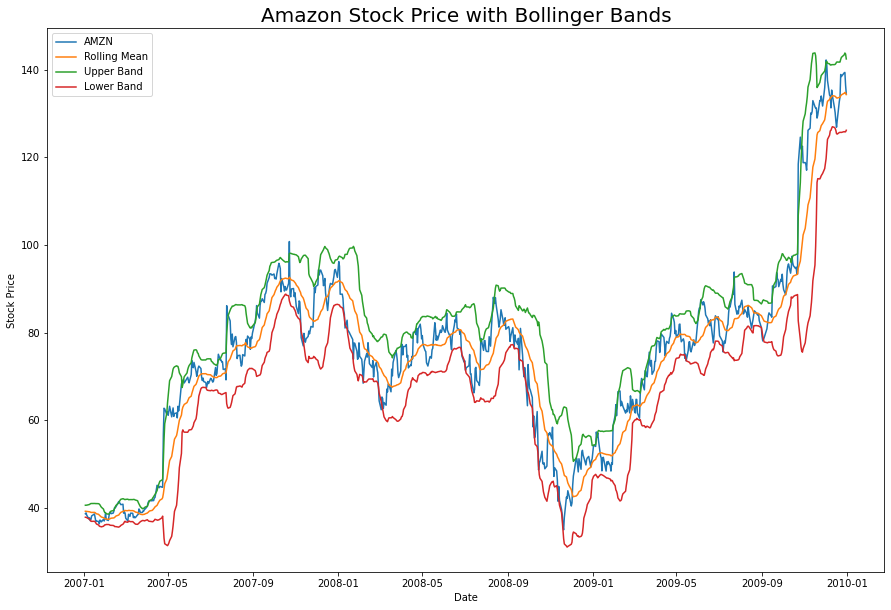

In [28]:
plt.figure(figsize=[15,10])
plt.title('Amazon Stock Price with Bollinger Bands', fontsize=20)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Stock Price', fontsize=10)
plt.grid(False)

for col in df.columns:
    plt.plot(df['2007-01-01':'2009-12-31'][col], label=str(col))
    
plt.legend(loc=2)

In [39]:
# BUY SIGNAL: WHEN CLOSE PRICE IS BELOW LOWER BAND
# SELL SIGNAL: WHEN CLOSE PRICE IS ABOVE ROLLING MEAN

pos, nData, nTrades = 0,0,0
returns = []
wealth = 1

for date in df.index:
    nData += 1
    close = df[stock][date]
    lower = df['Lower Band'][date]
    mean = df['Rolling Mean'][date]
    upper = df['Upper Band'][date]
    
    if close <= lower: # BUY SIGNAL
        if pos == 0:
            nTrades += 1
            pos += 1
            buy = close
    
    elif close >= mean: # SELL SIGNAL
        if pos > 0:
            pos -= 1
            sell = close
            ret = (sell - buy)/buy
            returns.append(ret.round(2))
    
    if nData == (df.shape[0] - 1) and pos > 0:
        pos -= 1
        sell = close
        ret = (sell - buy)/buy
        returns.append(ret.round(2))

for r in returns:
    wealth = wealth * (r+1)

totalReturn = (wealth - 1)/1

print("Total {} trades were executed.".format(nTrades))
print("$1 investment becomes $ {}, and total cumulative return is {}%".format(wealth,totalReturn*100))

Total 82 trades were executed.
$1 investment becomes $ 8.63982234892899, and total cumulative return is 763.982234892899%


In [40]:
# BUY SIGNAL: WHEN CLOSE PRICE IS BELOW LOWER BAND
# SELL SIGNAL: WHEN CLOSE PRICE IS ABOVE UPPER BAND

pos, nData, nTrades = 0,0,0
returns = []
wealth = 1

for date in df.index:
    nData += 1
    close = df[stock][date]
    lower = df['Lower Band'][date]
    mean = df['Rolling Mean'][date]
    upper = df['Upper Band'][date]
    
    if close <= lower: # BUY SIGNAL
        if pos == 0:
            nTrades += 1
            pos += 1
            buy = close
    
    elif close >= upper: # SELL SIGNAL
        if pos > 0:
            pos -= 1
            sell = close
            ret = (sell - buy)/buy
            returns.append(ret.round(2))
    
    if nData == (df.shape[0] - 1) and pos > 0:
        pos -= 1
        sell = close
        ret = (sell - buy)/buy
        returns.append(ret.round(2))

for r in returns:
    wealth = wealth * (r+1)

totalReturn = (wealth - 1)/1

print("Total {} trades were executed.".format(nTrades))
print("$1 investment becomes $ {}, and total cumulative return is {}%".format(wealth,totalReturn*100))

Total 59 trades were executed.
$1 investment becomes $ 26.341501392473127, and total cumulative return is 2534.150139247313%
